In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\kerry\AppData\Local\Temp\ipykernel_21668\3609341226.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\cp1252.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\li

In [2]:
from pandas_datareader import DataReader as pdr
import plotly.graph_objects as go
import numpy as np

spy = pdr('SPY', 'yahoo', start=1990)['Adj Close']
spy = spy.resample('Y').last()
spy = spy.pct_change().dropna()
spy.index = spy.index.to_period('Y').astype(str)
spy = spy.reset_index()
spy.columns = ['date', 'ret']

trace = go.Scatter(
    x=spy.date,
    y=spy.ret,
        hovertemplate="%{x}<br>%{y:.1%}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="",
    yaxis_tickformat=".0%",
    width=1040,
    height=520,
  )
fig.update_xaxes(title_font_size=24)
fig.update_yaxes(title_font_size=24)
fig.update_layout(font_size=20)

fig.show()

In [3]:
#| column: page

compound = (1+spy.ret).cumprod()

trace = go.Scatter(
    x=spy.date,
    y=compound,
        hovertemplate="%{x}<br>$%{y:.2f}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation from $1",
    yaxis_tickformat=".0f",
    width=1040,
    height=520,
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="right", 
        x=0.99
    )
  )
fig.update_xaxes(title_font_size=24)
fig.update_yaxes(title_font_size=24)
fig.update_layout(font_size=20)

fig.show()

In [4]:
#| column: page

r1 = np.cumprod([1] + 51*[1.1])
r2 = np.cumprod([1] + 30*[1.02] + 21*[1.1])
years = np.arange(1970, 2022)

trace1 = go.Scatter(
  x=years,
  y=r1,
  mode="lines",
  name="stock 1"
)

trace2 = go.Scatter(
  x=years,
  y=r2,
  mode="lines",
  name="stock 2"
)

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
string = "year %{x}<br>accum = %{y:.2f}"
fig.update_traces(hovertemplate=string)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation",
    yaxis_tickprefix="$", 
    yaxis_tickformat=",.0f",
    width=1040,
    height=520,
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="left", 
        x=0.1
    )
)
fig.update_xaxes(title_font_size=24)
fig.update_yaxes(title_font_size=24)
fig.update_layout(font_size=20)
fig.show()

In [5]:
#| column: page

r1 = np.log10(np.cumprod([1] + 51*[1.1]))
r2 = np.log10(np.cumprod([1] + 30*[1.02] + 21*[1.1]))
years = np.arange(1970, 2022)

trace1 = go.Scatter(
  x=years,
  y=r1,
  mode="lines",
  name="stock 1"
)

trace2 = go.Scatter(
  x=years,
  y=r2,
  mode="lines",
  name="stock 2"
)

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
string = "year %{x}<br>log = %{y:.2f}"
fig.update_traces(hovertemplate=string)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Log of Accumulation",
    yaxis_tickformat=",.1f",
    width=1040,
    height=520,
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="left", 
        x=0.1
    )
)
fig.update_xaxes(title_font_size=24)
fig.update_yaxes(title_font_size=24)
fig.update_layout(font_size=20)
fig.show()

In [6]:
#| column: page

r1 = np.cumprod([1] + 51*[1.1])
r2 = np.cumprod([1] + 30*[1.02] + 21*[1.1])
years = np.arange(1970, 2022)

trace1 = go.Scatter(
  x=years,
  y=r1,
  mode="lines",
  name="stock 1"
)

trace2 = go.Scatter(
  x=years,
  y=r2,
  mode="lines",
  name="stock 2"
)

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
string = "year %{x}<br>log = %{y:.2f}"
fig.update_traces(hovertemplate=string)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation ($)",
    yaxis_tickformat=",.0f",
    width=1040,
    height=520,
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="left", 
        x=0.1
    ),
    yaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 5, 10, 20, 50, 100],
    )
)
fig.update_xaxes(title_font_size=24)
fig.update_yaxes(title_font_size=24, type="log")
fig.update_layout(font_size=20)
fig.show()

In [7]:
#| column: page

trace = go.Scatter(
    x=spy.date,
    y=compound,
        hovertemplate="%{x}<br>$%{y:.2f}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation from $1",
    yaxis_tickformat=".0f",
    width=1040,
    height=520,
    yaxis = dict(
        tickmode = 'array',
        tickvals = [2, 5, 10, 16],
    )
  )
fig.update_xaxes(title_font_size=24)
fig.update_yaxes(title_font_size=24, type="log")
fig.update_layout(font_size=20)

fig.show()

In [8]:
#| column: page

trace = go.Box(
    x=spy.ret,
    text=spy.date,
    hovertemplate="%{text}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    yaxis_title="",
    xaxis_title="Annual Return",
    xaxis_tickformat=".0%",
    yaxis_tickformat="",
    width=1040,
    height=520,
)
fig.update_xaxes(title_font_size=24)
fig.update_yaxes(title_font_size=24)
fig.update_layout(font_size=20)

fig.show()

In [9]:
#| column: page


from scipy.stats import norm
from scipy.stats import gaussian_kde as kde

density = kde(spy.ret)

m = spy.ret.mean()
s = spy.ret.std()
grid = np.linspace(m - 4 * s, m + 4 * s, 201)

trace1 = go.Scatter(
  x=grid,
  y=density(grid),
  mode="lines",
  name="actual"
)

trace2 = go.Scatter(
  x=grid, 
  y=norm.pdf(grid, loc=m, scale=s), 
  mode="lines", 
  name="normal"
)
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="Annual Return",
    yaxis_title="",
    xaxis_tickformat=".0%",
    yaxis_tickformat="",
    width=1040,
    height=520,
     legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="right", 
        x=0.99
    ),
)
fig.update_xaxes(title_font_size=24)
fig.update_yaxes(title_font_size=24)
fig.update_layout(font_size=20)

fig.show()

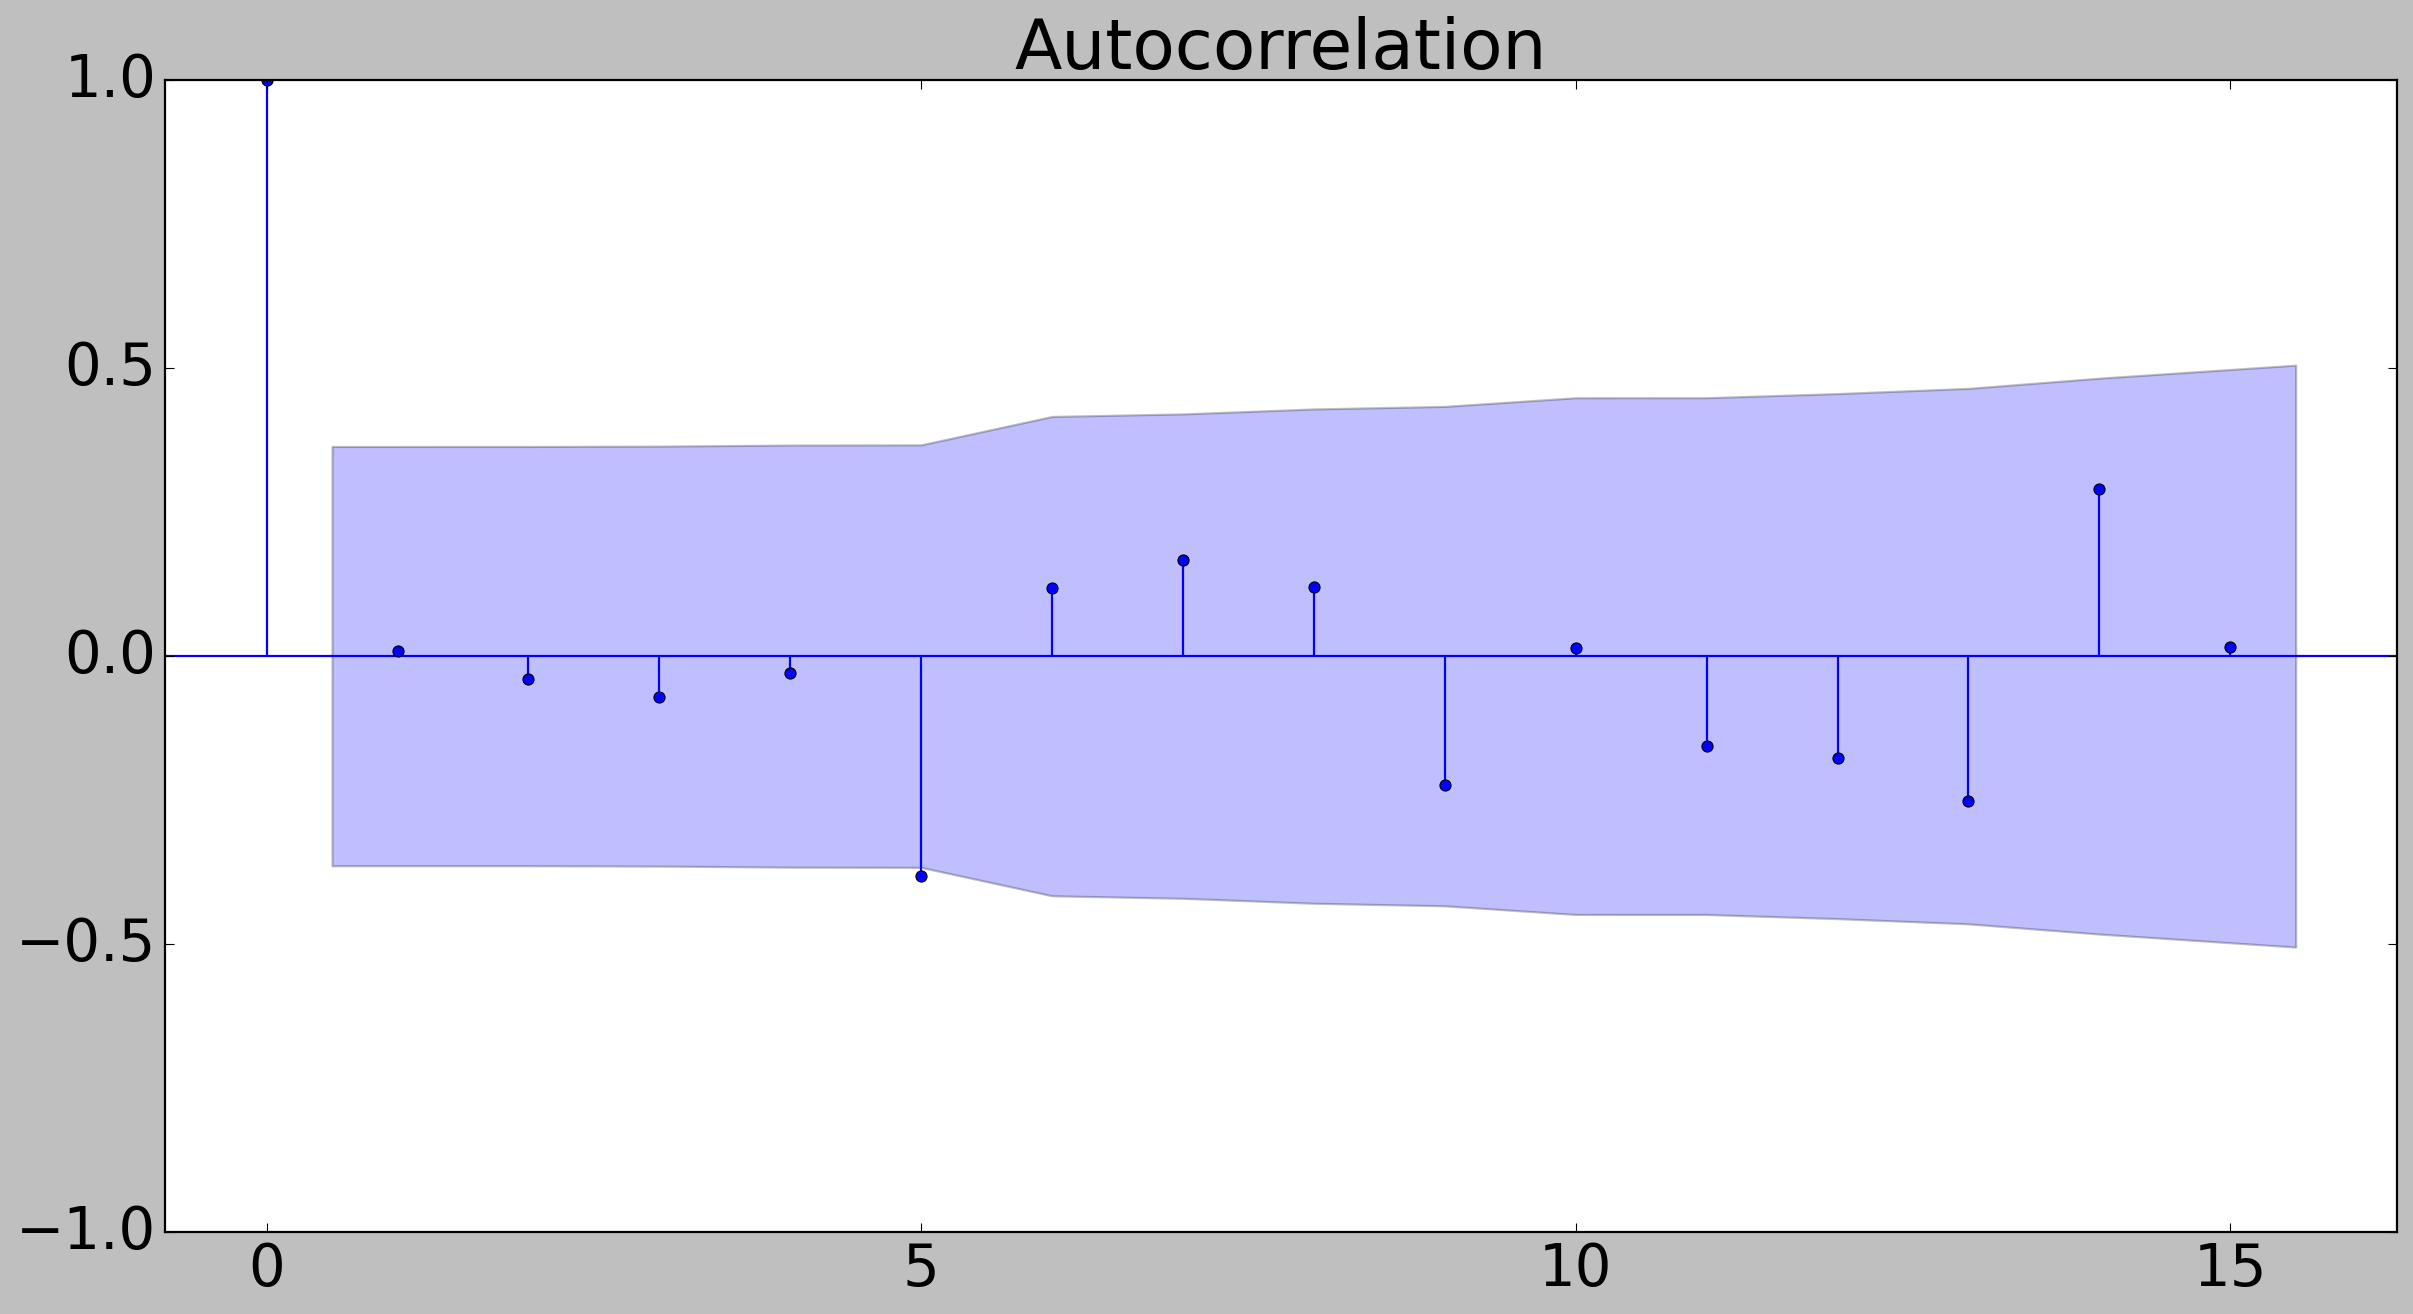

In [10]:
#| column: page

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams.update({'font.size': 26})
fig = plot_acf(spy.ret)

_ = fig.set_size_inches(18,9)

In [11]:
#| column: page

import statsmodels.formula.api as smf

spy['lag'] = spy.ret.shift()
spy = spy.dropna()

trace = go.Scatter(
  x=spy.lag,
  y=spy.ret,
  text=spy.date,
  mode="markers",
  hovertemplate="%{text}<extra></extra>",
  showlegend=False,
)
fig = go.Figure(trace)

result = smf.ols("ret ~ lag", data=spy).fit()
predict = result.params['Intercept'] + result.params['lag']*spy.lag

trace = go.Scatter(
  x=spy.lag,
  y=predict,
  mode="lines",
  name="regression line"
)

fig.add_trace(trace)

fig.update_layout(
    template="plotly_dark",
    xaxis_title="Lagged Return",
    yaxis_title="Return",
    xaxis_tickformat=".0%",
    yaxis_tickformat=".0%",
    width=1040,
    height=520,
)
fig.update_xaxes(title_font_size=24)
fig.update_yaxes(title_font_size=24)
fig.update_layout(font_size=20)
fig.show()